In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [71]:
import math

import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [92]:
### Configuration
dataFile = '../Data/FormationPrediction.csv'

# Data columns
colsInputs = ['GammaRay_API','BulkDensity_GPerCC','Resistivity_OHMSM','DensityPorosity_PCT','EffectivePorosity_PCT','TotalOrganicCarbon_WTPCT','TVD_FT']
colsOutputs = ['Formation Class']
colsDrop = ['WellName','Latitude_BH','Longitude_BH','TopOfZone_FT','BottomOfZone_FT','Isopach_FT']

# Split train and test data
testsize = 0.25
cv = 5

In [93]:
### Data Loading (raw data)
df = pd.read_csv(dataFile)
df = df.drop(columns=colsDrop,axis='columns')

In [94]:
### Data Pre-processing
inputs = df[colsInputs]
outputs = df[colsOutputs]

# Split "Train" and "Test" data
[xtrain,xtest,ytrain,ytest] = train_test_split(inputs,outputs,test_size=testsize,random_state=19)
print("Train Size = " + str(len(xtrain)) + ", Test Size = " + str(len(xtest)))

temp = ['TVD_FT']

depthtrain = xtrain[temp]
depthtest = xtest[temp]

xtrain.drop(columns=temp)
xtest.drop(columns=temp);

Train Size = 5127, Test Size = 1710


In [95]:
# Logistic Regression
reg = LogisticRegression()
model = reg.fit(xtrain,ytrain.values.ravel())
print("Coefficients = " + str(reg.coef_))
print("Intercept = " + str(reg.intercept_))

# Model prediction
ytestpred = model.predict(xtest)
confusion_matrix(ytest,ytestpred)

Coefficients = [[ 0.08951806  0.00194041  0.00855058  0.00029699  0.00021593  0.00652425
  -0.00122076]]
Intercept = [0.0008872]


array([[1412,   26],
       [  56,  216]], dtype=int64)

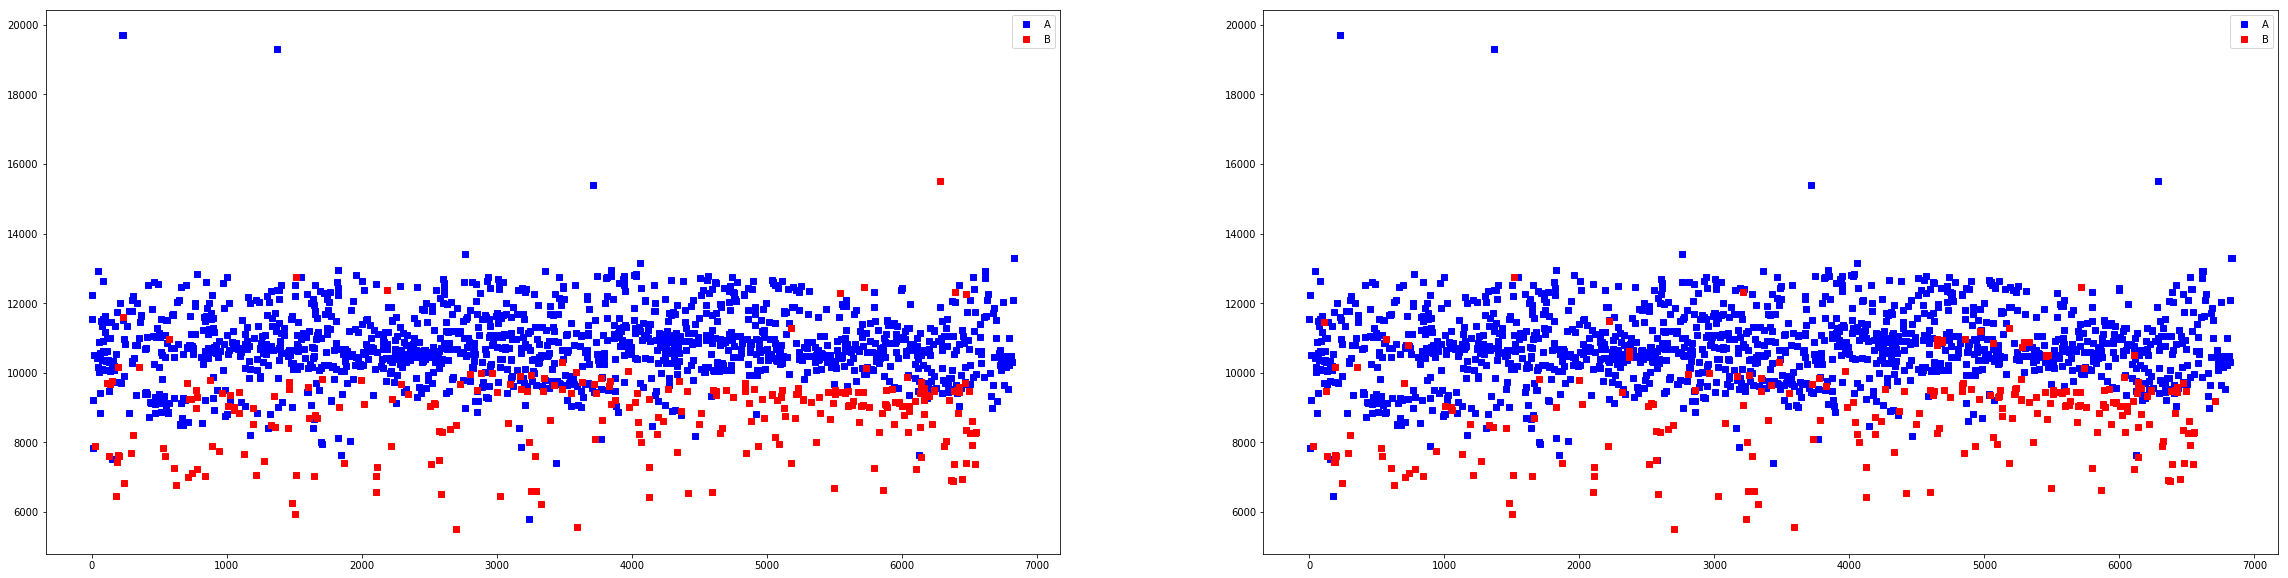

In [100]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(40,10))
ax = ax.flatten()

ax[0].plot(depthtest[ytest["Formation Class"]=="A"],'bs')
ax[0].plot(depthtest[ytest["Formation Class"]=="B"],'rs')
ax[0].legend(['A','B'])

ax[1].plot(depthtest[ytestpred=="A"],'bs')
ax[1].plot(depthtest[ytestpred=="B"],'rs')
ax[1].legend(['A','B']);
